# Benchmark

In this notebook, we show how the different variants of MMD-MA scale as a function of the number of samples n and the number of features p. We assume that both views have the same number of samples and features. We compare the performances of four versions of MMD-MA: the primal formulation without KeOps, the primal formulation with KeOps, the dual formulation without KeOps and the dual formulation with KeOps. 

We ran the four algorithms on a generated dataset using the function `data_pipeline.generate_data` for a number of features varying from 10 to 10000 and a number of samples varying from 1000 to 1e6. To generate the data, the `simulation` argument was set to 'branch' and we fixed the `random_seed` to 4. The dimension of the final embeddings of MMD-MA was set to 10. We ran the training loop of MMD-MA for 500 epochs.

All datapoints are obtained on a GPU V100 with 16GB.

In [ ]:
from IPython.display import Image

## Runtime as a function of the number of samples and the number of features

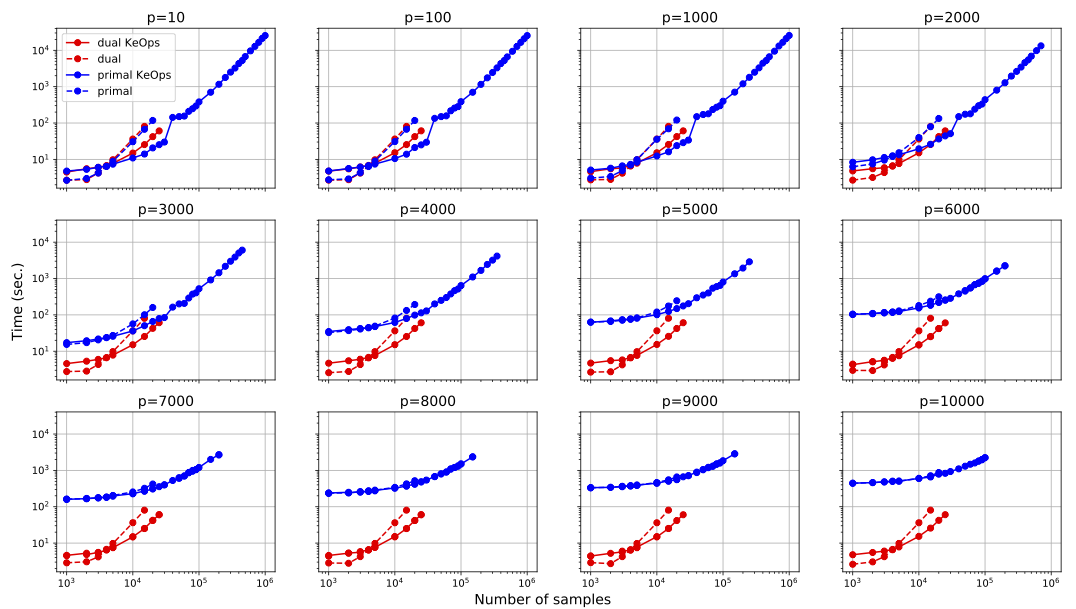

In [ ]:
Image('runtime_notebook.png')

All missing datapoints correspond to memory overflow. 

## Log ratio of runtime between variants of MMD-MA


Pairs of variants of MMD-MA are compared. The log ratio of the runtime is plotted in the figures below. 

Dark blue regions mean that the denominator method in the log ratio had a memory overflow and could not run. Therefore, these dark blue regions indicate that the numerator method is the only one available for the given combination of features and samples. 

The white lines indicate the transition between one method being favorable over the other one. 

The hatched region indicate that none of the methods compared could run (out-of-memory problems). 

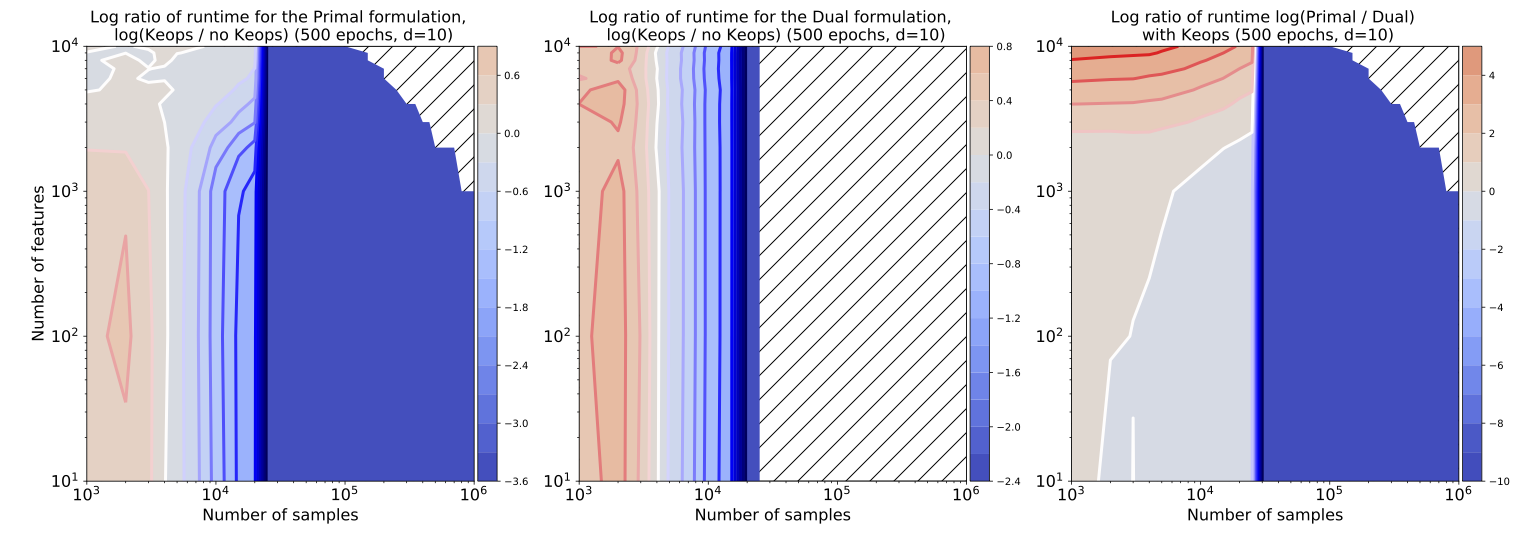

In [ ]:
Image('contourplot_notebook.png')

A set of rules can be derived from these runtime analyses:
- if the number of samples is smaller than 5000, it is better in terms of runtime not to use KeOps. If the number of samples is larger than 5000 the opposite is true.
- if the number of samples is larger than 20000, methods without KeOps become OOM, therefore KeOps becomes indispensable.
- if the number of samples is larger than 25000, only the primal formulation with KeOps can scale memory-wise.
- if the number of features is larger than 2000, it is better to use the dual formulation when it scales. If the number of features is smaller than 2000, the primal formulation leads to a better or equivalent runtime. 

## Summary: fastest implementation as a function of the number of features and samples


The following plot displays the fastest method as a function of the number of features and samples (evaluated on 500 epochs).

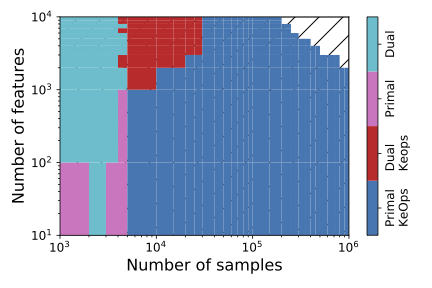

In [ ]:
Image('pcolor_notebook.png')